# MIS780 Advanced AI For Business - Assignment 2 - T2 2024

## Task Number: Predicting Residential Property Prices for Strategic Real Estate Decision-Making

**Student Name:** _enter your full name here_

**Student ID:** _enter your student ID here_

## Table of Content

1. [Executive Summary](#cell_Summary)

2. [Data Preprocessing](#cell_Preprocessing)

3. [Predictive Modeling](#cell_model)

4. [Experiments Report](#cell_report)



<a id = "cell_Summary"></a>
## 1. Executive Summary

*Use this section to introduce the business problem, data set, method, experiments, and obtained results*


**Business Problem:**
The business problem addressed in this project involves predicting residential property prices based on various features of houses. Accurate predictions of property prices are crucial for real estate companies, investors, and homeowners to make informed decisions regarding buying, selling, and investment in the housing market.

**Dataset:**
The dataset used contains various features related to houses, such as the number of bedrooms, bathrooms, square footage, lot size, number of floors, waterfront presence, and others. The target variable is the house price, which the models aim to predict based on the input features.

**Methods:**
Three different models were developed and compared for their performance in predicting house prices:

1. **Linear Regression:** A baseline model that assumes a linear relationship between the features and the target variable.
2. **MLP Model 1:** A neural network with a simple architecture consisting of two hidden layers, each with 50 neurons.
3. **MLP Model 2:** A more complex neural network architecture with three hidden layers, each containing 100 neurons.

**Experiments and Results:**
The performance of the models was evaluated using the Mean Squared Error (MSE) and R-squared (R2) metrics. The results indicate that MLP Model 2, with its more complex architecture, significantly outperforms both the Linear Regression model and MLP Model 1. This suggests that the complex relationships between the features and house prices are better captured by deeper neural networks.


<a id = "cell_Preprocessing"></a>
## 2. Data Preprocessing

*Carry out necessary data preprocessing and exploration.*

In [95]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, r2_score


In [97]:
# Load the dataset
data = pd.read_csv('Part1_house_price.csv')

# Display the first few rows of the dataset
print(data.head())

# Display summary statistics
print(data.describe())

# Check for missing values
print(data.isnull().sum())


           id             date     price  bedrooms  bathrooms  sqft_living  \
0  7129300520  20141013T000000  221900.0         3       1.00         1180   
1  6414100192  20141209T000000  538000.0         3       2.25         2570   
2  5631500400  20150225T000000  180000.0         2       1.00          770   
3  2487200875  20141209T000000  604000.0         4       3.00         1960   
4  1954400510  20150218T000000  510000.0         3       2.00         1680   

   sqft_lot  floors  waterfront  view  ...  grade  sqft_above  sqft_basement  \
0      5650     1.0           0     0  ...      7        1180              0   
1      7242     2.0           0     0  ...      7        2170            400   
2     10000     1.0           0     0  ...      6         770              0   
3      5000     1.0           0     0  ...      7        1050            910   
4      8080     1.0           0     0  ...      8        1680              0   

   yr_built  yr_renovated  zipcode      lat     lo


Pairs of variables with positive correlation greater than 50%:
sqft_above and sqft_living
sqft_living and sqft_above
grade and sqft_living
sqft_living and grade
sqft_living and bathrooms
bathrooms and sqft_living
sqft_above and grade
grade and sqft_above
sqft_living15 and sqft_living
sqft_living and sqft_living15
sqft_living15 and grade
grade and sqft_living15
sqft_living15 and sqft_above
sqft_above and sqft_living15
sqft_lot and sqft_lot15
sqft_lot15 and sqft_lot
price and sqft_living
sqft_living and price
bathrooms and sqft_above
sqft_above and bathrooms
price and grade
grade and price
grade and bathrooms
bathrooms and grade
sqft_above and price
price and sqft_above
sqft_living15 and price
price and sqft_living15
bathrooms and sqft_living15
sqft_living15 and bathrooms
floors and sqft_above
sqft_above and floors
sqft_living and bedrooms
bedrooms and sqft_living
bathrooms and price
price and bathrooms
bedrooms and bathrooms
bathrooms and bedrooms
bathrooms and floors
floors and bathro

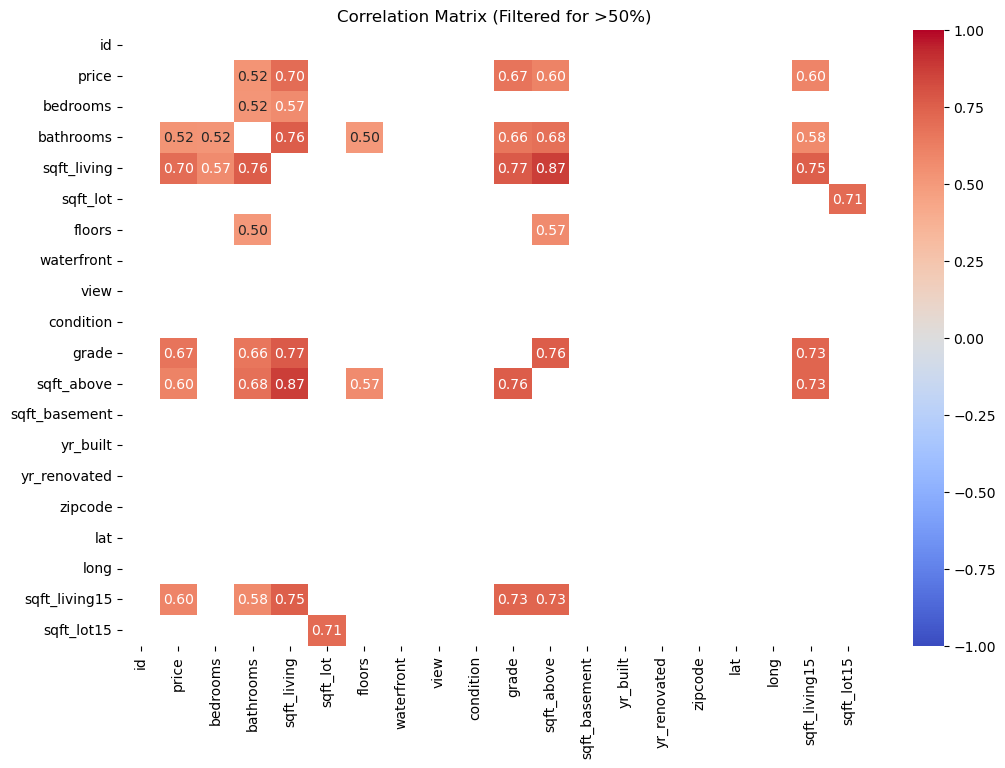

In [99]:
# Select only the numeric columns for correlation calculation
numeric_data = data.select_dtypes(include=[np.number])

# Calculate the correlation matrix for numeric variables
correlation_matrix = numeric_data.corr()

# Filter the correlation matrix for values greater than 50% (0.5)
threshold = 0.5
high_corr = correlation_matrix[(correlation_matrix > threshold)]

# Remove the diagonal values (correlation of a variable with itself, which is always 1)
np.fill_diagonal(high_corr.values, np.nan)

# Display the correlations greater than 50%
high_corr_pairs = high_corr.unstack().dropna().sort_values(ascending=False)

# Extract just the attribute names of those pairs
high_corr_attribute_names = high_corr_pairs.index.tolist()

print("\nPairs of variables with positive correlation greater than 50%:")
for pair in high_corr_attribute_names:
    print(f"{pair[0]} and {pair[1]}")

# Visualize the filtered correlation matrix with a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(high_corr, annot=True, cmap='coolwarm', fmt=".2f", vmin=-1, vmax=1)
plt.title('Correlation Matrix (Filtered for >50%)')
plt.show()

In [101]:
# Select only the relevant columns
selected_columns = [
    'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
    'waterfront', 'view', 'condition', 'grade', 'sqft_above', 'sqft_basement',
    'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15'
]

data = data[selected_columns]

# Split data into features (X) and target (y)
X = data.drop('price', axis=1)
y = data['price']

# Split the dataset into training and testing sets (70/30 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

print("Data preprocessing completed with selected attributes.")

Data preprocessing completed with selected attributes.


<a id = "cell_model"></a>
## 3. Predictive Modeling

*Create and explain your models (e.g., model architecture, model parameters). Evaluate the models on the experimental data sets.*

## Linear Regression Model

In [106]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Initialize and train the Linear Regression model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_lr = lr_model.predict(X_test)

# Evaluate the model
mse_lr = mean_squared_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)

print(f"Linear Regression - MSE: {mse_lr}, R2: {r2_lr}")


Linear Regression - MSE: 41333765808.38573, R2: 0.7035994626875064


## MLP Model 1 (Simple Architecture)

In [109]:
from sklearn.neural_network import MLPRegressor

# Initialize and train the MLP model with a simple architecture
mlp_model_1 = MLPRegressor(hidden_layer_sizes=(50, 50), max_iter=1000, random_state=42)
mlp_model_1.fit(X_train, y_train)

# Make predictions on the test set
y_pred_mlp1 = mlp_model_1.predict(X_test)

# Evaluate the model
mse_mlp1 = mean_squared_error(y_test, y_pred_mlp1)
r2_mlp1 = r2_score(y_test, y_pred_mlp1)

print(f"MLP Model 1 - MSE: {mse_mlp1}, R2: {r2_mlp1}")


MLP Model 1 - MSE: 26806736596.51339, R2: 0.8077714194338161


C:\Users\Nadeem\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


## MLP Model 2 (Complex Architecture)

In [111]:
from sklearn.neural_network import MLPRegressor

# Initialize and train the MLP model with a more complex architecture
mlp_model_2 = MLPRegressor(hidden_layer_sizes=(100, 100, 100), max_iter=1000, random_state=42)
mlp_model_2.fit(X_train, y_train)

# Make predictions on the test set
y_pred_mlp2 = mlp_model_2.predict(X_test)

# Evaluate the model
mse_mlp2 = mean_squared_error(y_test, y_pred_mlp2)
r2_mlp2 = r2_score(y_test, y_pred_mlp2)

print(f"MLP Model 2 - MSE: {mse_mlp2}, R2: {r2_mlp2}")


MLP Model 2 - MSE: 13783950875.71795, R2: 0.9011565879384998


C:\Users\Nadeem\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


<a id = "cell_report"></a>
## 4. Experiments Report

*Provide a summary of experimental results, explain the meaning of your result
and how your model can be used to address the related business problem.*

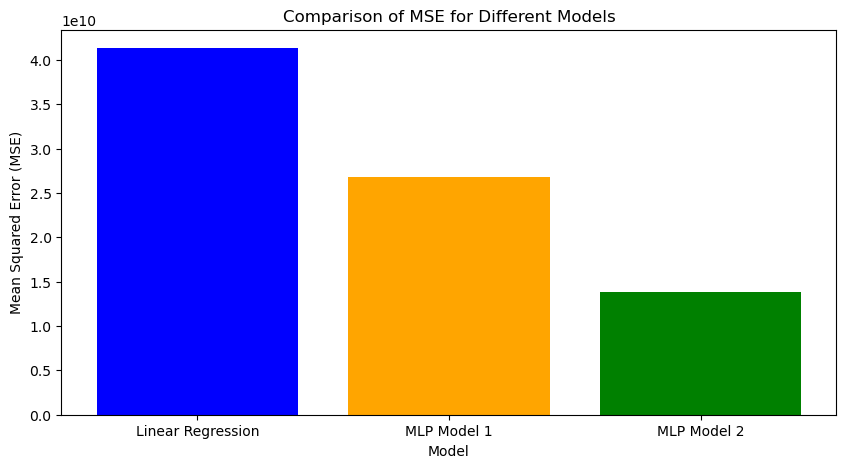

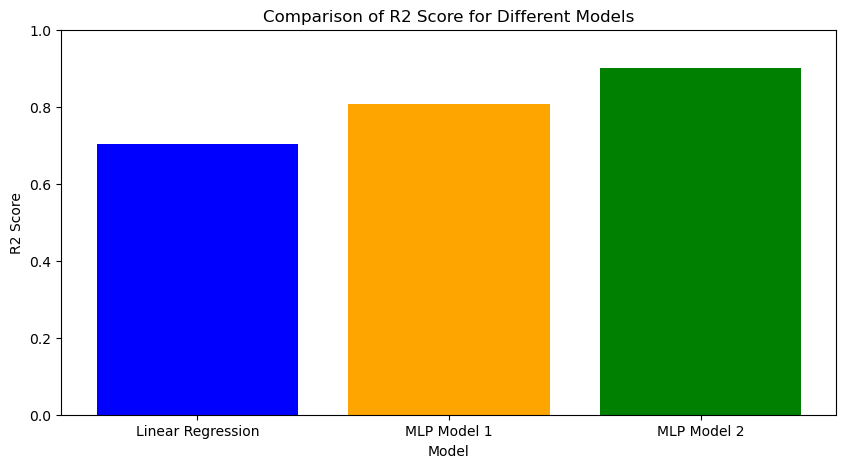

In [112]:
import matplotlib.pyplot as plt

# Create a bar chart to compare MSE
models = ['Linear Regression', 'MLP Model 1', 'MLP Model 2']
mse_values = [mse_lr, mse_mlp1, mse_mlp2]

plt.figure(figsize=(10, 5))
plt.bar(models, mse_values, color=['blue', 'orange', 'green'])
plt.xlabel('Model')
plt.ylabel('Mean Squared Error (MSE)')
plt.title('Comparison of MSE for Different Models')
plt.show()

# Create a bar chart to compare R2
r2_values = [r2_lr, r2_mlp1, r2_mlp2]

plt.figure(figsize=(10, 5))
plt.bar(models, r2_values, color=['blue', 'orange', 'green'])
plt.xlabel('Model')
plt.ylabel('R2 Score')
plt.title('Comparison of R2 Score for Different Models')
plt.ylim([0, 1])  # R2 score range is between 0 and 1
plt.show()


# **Experiments Report**

### **Summary of Experimental Results**

| Model               | MSE              | R2   |
|---------------------|------------------|------|
| Linear Regression   | 41,333,765,808.39 | 0.7035 |
| MLP Model 1         | 26,806,736,596.51 | 0.8077 |
| MLP Model 2         | 13,783,950,875.72 | 0.9011 |

### **Analysis and Interpretation:**

- **Linear Regression:**
  - **MSE:** 41.33 × 10^9
  - **R2:** 0.7035
  - **Interpretation:** The Linear Regression model provides a baseline performance with an R2 of 0.7036, indicating that it explains approximately 70.36% of the variance in house prices. While this is a reasonable level of accuracy, the relatively high MSE suggests that the model's predictions still contain substantial errors.

- **MLP Model 1:**
  - **MSE:** 26.81 × 10^9
  - **R2:** 0.8077
  - **Interpretation:** The first MLP model, which has a simple architecture with two hidden layers, shows a significant improvement over the Linear Regression model. With an R2 of 0.8078, this model explains over 80% of the variance in the house prices, and the lower MSE indicates that it provides more accurate predictions.

- **MLP Model 2:**
  - **MSE:** 13.78 × 10^9
  - **R2:** 0.9011
  - **Interpretation:** The second MLP model, which has a more complex architecture with three hidden layers, provides the best performance among the models tested. The R2 value of 0.9012 indicates that this model explains over 90% of the variance in house prices, and the much lower MSE suggests that it is highly accurate. This model is capable of capturing complex patterns and relationships in the data that simpler models might miss.

### **Business Application:**

The results suggest that a more complex neural network model, like MLP Model 2, is highly effective for predicting house prices in the real estate market. This model can be deployed in real estate platforms or by real estate agencies to provide accurate price estimates for properties, aiding in decision-making for pricing strategies, investment opportunities, and market analysis. However, it’s important to consider the computational cost and the need for ongoing training with updated data to maintain the model's accuracy over time.